# Data Preprocessing

In [1]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt  # Matlab-style plotting
# Make sure plot shows immediately
%matplotlib inline 
import seaborn as sns # Library for plotting
color = sns.color_palette()
sns.set_style('darkgrid')

## Members

In [2]:
df_members = pd.read_csv("./data/Members.csv")

In [3]:
df_members

,MemberID,AgeAtFirstClaim,Sex
0,14723353,70-79,M
1,75706636,70-79,M
2,17320609,70-79,M
3,69690888,40-49,M
4,33004608,0-9,M
...,...,...,...
112995,99711514,40-49,F
112996,31690877,50-59,F
112997,9519985,30-39,F
112998,92806272,50-59,F


In [4]:
sex_unique = df_members["Sex"].unique()
sex_unique

array(['M', 'F', nan], dtype=object)

In [5]:
df_members["Sex"].fillna("NaN", inplace=True)

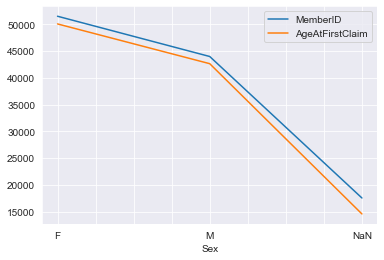

In [6]:
df_members.groupby("Sex").count().plot()

$\Rightarrow$ One hot encode Sex, remove F

In [7]:
vl = df_members["Sex"].value_counts()
vl

F      51482
M      43966
NaN    17552
Name: Sex, dtype: int64

In [8]:
for index, value in list(zip(vl.index, vl)):
    print("{}: {}".format(index, value))

F: 51482
M: 43966
NaN: 17552


<BarContainer object of 3 artists>

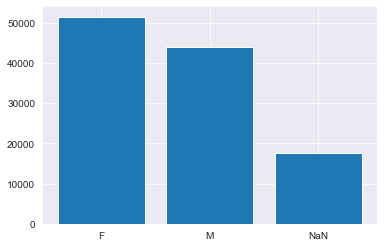

In [9]:
plt.bar(vl.index, vl)

In [10]:
def one_hot_encode(df, column, params=None):
    df[column].fillna("NaN", inplace=True)
    if params == None:
        value_count = df[column].value_counts()

        plt.title("Count of " + column)
        plt.ylabel("Count")
        sns.barplot(value_count.index, value_count)

        category = list(value_count.index)
        max_category = category[np.argmax(value_count)]
        category.remove(max_category)
        
        for index in category:
            column_name = "{}_{}".format(column, index)
            df[column_name] = 0
            df.loc[df[column] == index, column_name] = 1

        df.drop(columns=[column], inplace=True)
        return { "category": list(value_count.index), "drop": max_category }
    else:
        category = params.category
        drop = params.drop
        category.remove(drop)

        for index in category:
            column_name = "{}_{}".format(column, index)
            df[column_name] = 0
            df.loc[df[column] == index, column_name] = 1

        df.drop(columns=[column], inplace=True)
        return params

{'category': ['F', 'M', 'NaN'], 'drop': 'F'}

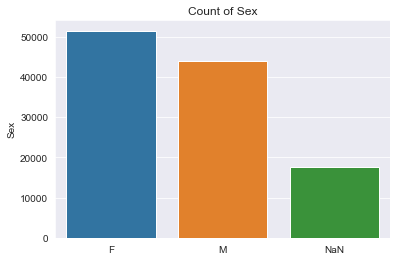

In [11]:
one_hot_encode(df_members, "Sex")

In [12]:
df_members

,MemberID,AgeAtFirstClaim,Sex_M,Sex_NaN
0,14723353,70-79,1,0
1,75706636,70-79,1,0
2,17320609,70-79,1,0
3,69690888,40-49,1,0
4,33004608,0-9,1,0
...,...,...,...,...
112995,99711514,40-49,0,0
112996,31690877,50-59,0,0
112997,9519985,30-39,0,0
112998,92806272,50-59,0,0


In [13]:
df_members["AgeAtFirstClaim"].value_counts()

40-49    16111
70-79    14514
50-59    13329
60-69    12622
30-39    12435
10-19    11319
0-9      10791
20-29     8505
80+       7621
Name: AgeAtFirstClaim, dtype: int64

In [14]:
age_list = list(df_members["AgeAtFirstClaim"].value_counts().index)
age_list.sort()
age_list

['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

In [15]:
mean_age_list = [ 5, 15, 25, 35, 45, 55, 65, 75, 80]

In [16]:
for age, mean_age in zip(age_list, mean_age_list):
    df_members.loc[df_members["AgeAtFirstClaim"] == age, "AgeAtFirstClaim"] = mean_age

In [17]:
df_members

,MemberID,AgeAtFirstClaim,Sex_M,Sex_NaN
0,14723353,75,1,0
1,75706636,75,1,0
2,17320609,75,1,0
3,69690888,45,1,0
4,33004608,5,1,0
...,...,...,...,...
112995,99711514,45,0,0
112996,31690877,55,0,0
112997,9519985,35,0,0
112998,92806272,55,0,0


In [18]:
df_members.to_csv("./processed/Members.csv", index=False)

## Claim counts

In [19]:
df_claims = pd.read_csv("./data/Claims.csv")

In [20]:
df_claim_y1 = df_claims[df_claims["Year"] == "Y1"]
print(df_claim_y1.shape)
df_claim_y2 = df_claims[df_claims["Year"] == "Y2"]
print(df_claim_y2.shape)
df_claim_y12 = df_claims[(df_claims["Year"] == "Y1") | (df_claims["Year"] == "Y2")]
print(df_claim_y12.shape)

(865689, 14)
(898872, 14)
(1764561, 14)


In [21]:
count_y1 = df_claim_y1["MemberID"].value_counts()
count_y1

90461158    43
98710886    43
21291404    43
76788452    43
48490886    43
            ..
63048045     1
44961629     1
91223906     1
71479674     1
81454587     1
Name: MemberID, Length: 76038, dtype: int64

In [22]:
df_claim_count_y1 = pd.DataFrame({ "MemberID": list(count_y1.index), "ClaimCount_Y1": list(count_y1)})
df_claim_count_y1

,MemberID,ClaimCount_Y1
0,90461158,43
1,98710886,43
2,21291404,43
3,76788452,43
4,48490886,43
...,...,...
76033,63048045,1
76034,44961629,1
76035,91223906,1
76036,71479674,1


(array([29449., 14506.,  9153.,  6192.,  4079.,  3788.,  2311.,  2155.,
         2098.,  2307.]),
 array([ 1. ,  5.2,  9.4, 13.6, 17.8, 22. , 26.2, 30.4, 34.6, 38.8, 43. ]),
 <a list of 10 Patch objects>)

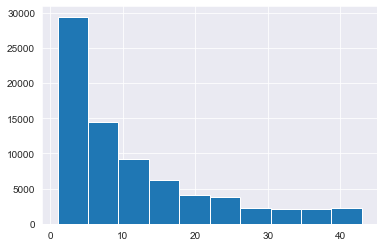

In [23]:
plt.hist(df_claim_count_y1["ClaimCount_Y1"])

In [24]:
df_claim_count_y1.to_csv("./processed/ClaimCount_Y1.csv", index=False)

In [25]:
count_y2 = df_claim_y2["MemberID"].value_counts()
count_y2

93426517    43
92972354    43
25800369    43
16723553    43
61970496    43
            ..
62869024     1
7249853      1
1173006      1
94682201     1
46462893     1
Name: MemberID, Length: 71435, dtype: int64

In [26]:
df_claim_count_y2 = pd.DataFrame({ "MemberID": list(count_y2.index), "ClaimCount_Y2": list(count_y2)})
df_claim_count_y2

,MemberID,ClaimCount_Y2
0,93426517,43
1,92972354,43
2,25800369,43
3,16723553,43
4,61970496,43
...,...,...
71430,62869024,1
71431,7249853,1
71432,1173006,1
71433,94682201,1


In [27]:
df_claim_count_y2.to_csv("./processed/ClaimCount_Y2.csv", index=False)

## ProviderID

In [28]:
pvdid_nunique_y1 = df_claim_y1.groupby("MemberID")["ProviderID"].nunique(dropna=True)

In [29]:
df_pvdid_nunique_y1 = pd.DataFrame({ "MemberID": pvdid_nunique_y1.index, "UniqueProviderID_Y1": pvdid_nunique_y1})
df_pvdid_nunique_y1

,MemberID,UniqueProviderID_Y1
MemberID,,
210,210,4
3197,3197,3
3889,3889,7
4187,4187,3
9063,9063,2
...,...,...
99995554,99995554,3
99996214,99996214,1
99997485,99997485,1


In [30]:
df_pvdid_nunique_y1.to_csv("./processed/ProviderID_Y1.csv", index=False)

In [31]:
pvdid_nunique_y2 = df_claim_y2.groupby("MemberID")["ProviderID"].nunique(dropna=True)

In [32]:
df_pvdid_nunique_y2 = pd.DataFrame({ "MemberID": pvdid_nunique_y2.index, "UniqueProviderID_Y2": pvdid_nunique_y2})
df_pvdid_nunique_y2

,MemberID,UniqueProviderID_Y2
MemberID,,
4,4,1
210,210,3
3197,3197,4
3457,3457,1
3713,3713,5
...,...,...
99985996,99985996,2
99987030,99987030,3
99995391,99995391,2


In [33]:
df_pvdid_nunique_y2.to_csv("./processed/ProviderID_Y2.csv", index=False)

## VendorID

In [34]:
vid_nunique_y1 = df_claim_y1.groupby("MemberID")["Vendor"].nunique(dropna=True)
vid_nunique_y2 = df_claim_y2.groupby("MemberID")["Vendor"].nunique(dropna=True)

In [35]:
df_vd_unique_y1 = pd.DataFrame({ "MemberID": vid_nunique_y1.index, "UniqueVendorID_Y1": vid_nunique_y1})
df_vd_unique_y2 = pd.DataFrame({ "MemberID": vid_nunique_y2.index, "UniqueVendorID_Y2": vid_nunique_y2})

In [36]:
df_vd_unique_y1.to_csv("./processed/VendorID_Y1.csv", index=False)
df_vd_unique_y2.to_csv("./processed/VendorID_Y2.csv", index=False)

## PCP

In [37]:
pcp_nunique_y1 = df_claim_y1.groupby("MemberID")["PCP"].nunique(dropna=True)
pcp_nunique_y2 = df_claim_y2.groupby("MemberID")["PCP"].nunique(dropna=True)

In [38]:
df_pcp_unique_y1 = pd.DataFrame({ "MemberID": pcp_nunique_y1.index, "UniquePCP_Y1": pcp_nunique_y1})
df_pcp_unique_y2 = pd.DataFrame({ "MemberID": pcp_nunique_y2.index, "UniquePCP_Y2": pcp_nunique_y2})

In [39]:
df_pcp_unique_y1.to_csv("./processed/PCP_Y1.csv", index=False)
df_pcp_unique_y2.to_csv("./processed/PCP_Y2.csv", index=False)

## Specialty

In [40]:
spe_unique_y1 = df_claim_y1.groupby("MemberID")["Specialty"].nunique(dropna=True)
spe_unique_y2 = df_claim_y2.groupby("MemberID")["Specialty"].nunique(dropna=True)

In [41]:
spe_mode_all = df_claim_y12.groupby(["MemberID"])["Specialty"].agg(pd.Series.mode)

In [42]:
spe_mode_all

MemberID
4                                                  Pediatrics
210                                                  Internal
3197                                               Pediatrics
3457                                               Pediatrics
3713                                         General Practice
                                  ...                        
99996214                                     General Practice
99997485                                     General Practice
99997895                                           Laboratory
99998627                                             Internal
99998824    [Emergency, General Practice, Laboratory, Obst...
Name: Specialty, Length: 95507, dtype: object

note: có thể lấy trọng số cho từng khoa rồi tính ra chỉ số

In [43]:
df_spe_y1 = pd.DataFrame({ "MemberID": spe_unique_y1.index, "UniqueSpecialty_Y1": spe_unique_y1 })
df_spe_y2 = pd.DataFrame({ "MemberID": spe_unique_y2.index, "UniqueSpecialty_Y2": spe_unique_y2 })
df_spe_mode_all = pd.DataFrame({ "MemberID": spe_mode_all.index, "ModeSpeciaty": spe_mode_all})

In [44]:
df_spe_y1.to_csv("./processed/Specialty_Y1.csv", index=False)
df_spe_y2.to_csv("./processed/Specialty_Y2.csv", index=False)
df_spe_mode_all.to_csv("./processed/SpecialtyMode.csv", index=False)

## PlaceSVC

In [45]:
pl_mode_all = df_claim_y12.groupby(["MemberID"])["PlaceSvc"].agg(pd.Series.mode)

In [46]:
df_pl_mode_all = pd.DataFrame({ "MemberID": pl_mode_all.index, "ModePlaceSVC": pl_mode_all})

In [47]:
df_pl_mode_all.to_csv("./processed/PlaceSVCMode.csv", index=False)

## PayDelay

In [48]:
df_claim_y1.replace({'162+': '162'}, inplace=True)
df_claim_y2.replace({'162+': '162'}, inplace=True)

In [49]:
df_claim_y1["PayDelay"] = df_claim_y1["PayDelay"].astype("int32")
df_claim_y2["PayDelay"] = df_claim_y2["PayDelay"].astype("int32")

In [50]:
pdl_mean_y1 = df_claim_y1.groupby(["MemberID"])["PayDelay"].mean()
pdl_mean_y2 = df_claim_y2.groupby(["MemberID"])["PayDelay"].mean()
pdl_max_y1 = df_claim_y1.groupby(["MemberID"])["PayDelay"].max()
pdl_max_y2 = df_claim_y2.groupby(["MemberID"])["PayDelay"].max()

In [51]:
df_pdl_mean_y1 = pd.DataFrame({ "MemberID": pdl_mean_y1.index, "PayDelay_Mean_Y1": pdl_mean_y1})
df_pdl_mean_y2 = pd.DataFrame({ "MemberID": pdl_mean_y2.index, "PayDelay_Mean_Y2": pdl_mean_y2})
df_pdl_max_y1 = pd.DataFrame({ "MemberID": pdl_max_y1.index, "PayDelay_Max_Y1": pdl_max_y1})
df_pdl_max_y2 = pd.DataFrame({ "MemberID": pdl_max_y2.index, "PayDelay_Max_Y2": pdl_max_y2})

In [52]:
df_pdl_mean_y1.to_csv("./processed/PayDelayMean_Y1.csv", index=False)
df_pdl_mean_y2.to_csv("./processed/PayDelayMean_Y2.csv", index=False)
df_pdl_max_y1.to_csv("./processed/PayDelayMax_Y1.csv", index=False)
df_pdl_max_y2.to_csv("./processed/PayDelayMax_Y2.csv", index=False)

## PrimaryConditionGroup

In [53]:
pcg_mode_all = df_claim_y12.groupby(["MemberID"])["PrimaryConditionGroup"].agg(pd.Series.mode)

In [54]:
df_pcg_mode_all = pd.DataFrame({ "MemberID": pcg_mode_all.index, "PrimaryConditionGroup_Mode": pcg_mode_all})

In [55]:
df_pcg_mode_all.to_csv("./processed/PrimaryConditionGroupMode.csv", index=False)

## ProcedureGroup

In [56]:
pg_unique_y1 = df_claim_y1.groupby(["MemberID"])["ProcedureGroup"].nunique(dropna=True)
pg_unique_y2 = df_claim_y2.groupby(["MemberID"])["ProcedureGroup"].nunique(dropna=True)

In [57]:
pg_mode_all = df_claim_y12.groupby(["MemberID"])["ProcedureGroup"].agg(pd.Series.mode)

In [58]:
df_pg_unique_y1 = pd.DataFrame({ "MemberID": pg_unique_y1.index, "ProcedureGroup_Y1": pg_unique_y1})
df_pg_unique_y2 = pd.DataFrame({ "MemberID": pg_unique_y2.index, "ProcedureGroup_Y2": pg_unique_y2})
df_pg_mode_all = pd.DataFrame({ "MemberID": pg_mode_all.index, "ProcedureGroup_Mode": pg_mode_all})

In [59]:
df_pg_unique_y1.to_csv("./processed/ProcedureGroup_Y1.csv", index=False)
df_pg_unique_y2.to_csv("./processed/ProcedureGroup_Y1.csv", index=False)
df_pg_mode_all.to_csv("./processed/ProcedureGroup_Mode.csv", index=False)

## CharlsonIndex

In [77]:
def one_hot_count(index_col, count_value_col, df, one_hot_cols):
    # get unique index
    index_list = list(df[index_col].unique())
    # create df
    result_df = pd.DataFrame(index=index_list)
    result_df.index.name = index_col
    # fill one hot columns
    for col in one_hot_cols:
        col_name = "{}_{}".format(count_value_col, col)
        result_df[col_name] = 0
    # query and fill count
    query = df.groupby([index_col])[count_value_col].value_counts(dropna=False)
    i = 0
    length = len(index_list)
    for index in index_list:
        for col in one_hot_cols:
            col_name = "{}_{}".format(count_value_col, col)
            try:
                result_df.loc[index][col_name] = query.loc[(index, col)]
            except:
                continue

        if i % 10000 == 0:
            print("Processed: {}/{}".format(i, length))
        i += 1
    print("Processed: {}/{} DONE".format(i, length))
    return result_df

In [78]:
char_unique = df_claim_y12["CharlsonIndex"].unique()

In [79]:
df_char_count_y1 = one_hot_count("MemberID", "CharlsonIndex", df_claim_y1, char_unique)
df_char_count_y2 = one_hot_count("MemberID", "CharlsonIndex", df_claim_y2, char_unique)

Processed: 0/76038
Processed: 10000/76038
Processed: 20000/76038
Processed: 30000/76038
Processed: 40000/76038
Processed: 50000/76038
Processed: 60000/76038
Processed: 70000/76038
Processed: 76038/76038 DONE
Processed: 0/71435
Processed: 10000/71435
Processed: 20000/71435
Processed: 30000/71435
Processed: 40000/71435
Processed: 50000/71435
Processed: 60000/71435
Processed: 70000/71435
Processed: 71435/71435 DONE


In [80]:
df_char_count_y1.to_csv("./processed/CharlsonIndex_Count_Y1.csv")
df_char_count_y2.to_csv("./processed/CharlsonIndex_Count_Y2.csv")

## DSFS

In [81]:
dsfs_unique = list(df_claims["DSFS"].unique())
dsfs_unique

['8- 9 months',
 '7- 8 months',
 '0- 1 month',
 '5- 6 months',
 '4- 5 months',
 '3- 4 months',
 '1- 2 months',
 nan,
 '6- 7 months',
 '10-11 months',
 '11-12 months',
 '2- 3 months',
 '9-10 months']

In [82]:
dsfs_count_y1 = df_claim_y1["MemberID"].unique()

In [83]:
for mem_id in list(dsfs_count_y1):
    a = df_claim_y1[df_claim_y1["MemberID"] == mem_id]["DSFS"].value_counts()
    print(a)
    break

9-10 months     3
0- 1 month      2
1- 2 months     2
8- 9 months     2
10-11 months    1
7- 8 months     1
6- 7 months     1
Name: DSFS, dtype: int64


In [84]:
df_dsfs_count_y1 = one_hot_count("MemberID", "DSFS", df_claim_y1, dsfs_unique)

Processed: 0/76038
Processed: 10000/76038
Processed: 20000/76038
Processed: 30000/76038
Processed: 40000/76038
Processed: 50000/76038
Processed: 60000/76038
Processed: 70000/76038
Processed: 76038/76038 DONE


In [85]:
df_dsfs_count_y2 = one_hot_count("MemberID", "DSFS", df_claim_y2, dsfs_unique)

Processed: 0/71435
Processed: 10000/71435
Processed: 20000/71435
Processed: 30000/71435
Processed: 40000/71435
Processed: 50000/71435
Processed: 60000/71435
Processed: 70000/71435
Processed: 71435/71435 DONE


In [86]:
df_dsfs_count_y1.to_csv("./processed/DSFS_Count_Y1.csv")
df_dsfs_count_y2.to_csv("./processed/DSFS_Count_Y2.csv")

## LengthOfStay and SupLOS

In [87]:
los_unique = df_claim_y12["LengthOfStay"].unique()

In [88]:
df_los_count_y1 = one_hot_count("MemberID", "LengthOfStay", df_claim_y1, los_unique)

Processed: 0/76038
Processed: 10000/76038
Processed: 20000/76038
Processed: 30000/76038
Processed: 40000/76038
Processed: 50000/76038
Processed: 60000/76038
Processed: 70000/76038
Processed: 76038/76038 DONE


In [89]:
df_los_count_y2 = one_hot_count("MemberID", "LengthOfStay", df_claim_y2, los_unique)

Processed: 0/71435
Processed: 10000/71435
Processed: 20000/71435
Processed: 30000/71435
Processed: 40000/71435
Processed: 50000/71435
Processed: 60000/71435
Processed: 70000/71435
Processed: 71435/71435 DONE


In [111]:
df_los_count_y1.loc[50662559]

LengthOfStay_nan           15
LengthOfStay_1 day          0
LengthOfStay_2 days         0
LengthOfStay_3 days         0
LengthOfStay_4 days         0
LengthOfStay_1- 2 weeks     0
LengthOfStay_6 days         0
LengthOfStay_5 days         0
LengthOfStay_2- 4 weeks     0
LengthOfStay_4- 8 weeks     0
Name: 50662559, dtype: int64

In [100]:
df_claim_y1[df_claim_y1["MemberID"] == 50662559][["LengthOfStay", "SupLOS"]].shape

(37, 2)

In [99]:
df_los_count_y1.index.name

'MemberID'

In [97]:
df_claim_y1[(df_claim_y1["SupLOS"] == 1) & (df_claim_y1["LengthOfStay"].isna())]["MemberID"].value_counts()

50662559    22
47938711    21
70397270    21
88831184    19
50242206    18
            ..
56607113     1
66921602     1
10710791     1
17393416     1
6891484      1
Name: MemberID, Length: 1907, dtype: int64

In [109]:
def process_los_nan_with_suplos(df_los, df):
    # query suplos=1 and los=nan
    query = df[(df["SupLOS"] == 1) & (df["LengthOfStay"].isna())]["MemberID"].value_counts()
    # subtract number of suplos each member so we have the real los nan
    for index, value in zip(query.index, query):
        df_los.loc[index]["LengthOfStay_nan"] -= value

In [110]:
process_los_nan_with_suplos(df_los_count_y1, df_claim_y1)

In [112]:
process_los_nan_with_suplos(df_los_count_y2, df_claim_y2)

In [113]:
df_los_count_y1.to_csv("./processed/LengthOfStay_Count_Y1.csv")
df_los_count_y2.to_csv("./processed/LengthOfStay_Count_Y2.csv")

## DrugCount

In [124]:
df_drug = pd.read_csv("./data/DrugCount.csv")
df_drug["DrugCount"].replace({"7+": "7"}, inplace=True)
df_drug["DrugCount"] = df_drug["DrugCount"].astype("int32")

In [125]:
df_drug_y1 = df_drug[df_drug["Year"] == "Y1"]
df_drug_y2 = df_drug[df_drug["Year"] == "Y2"]

In [127]:
drug_sum_y1 = df_drug_y1.groupby(["MemberID"])["DrugCount"].sum()
drug_sum_y2 = df_drug_y2.groupby(["MemberID"])["DrugCount"].sum()

In [128]:
df_drug_sum_y1 = pd.DataFrame({ "MemberID": drug_sum_y1.index, "DrugCount_Y1": drug_sum_y1})
df_drug_sum_y2 = pd.DataFrame({ "MemberID": drug_sum_y2.index, "DrugCount_Y2": drug_sum_y2})

In [129]:
df_drug_sum_y1.to_csv("./processed/DrugCount_Y1.csv", index=False)
df_drug_sum_y2.to_csv("./processed/DrugCount_Y2.csv", index=False)

## LabCount

In [131]:
df_lab = pd.read_csv("./data/LabCount.csv")
df_lab["LabCount"].replace({"10+": "10"}, inplace=True)
df_lab["LabCount"] = df_lab["LabCount"].astype("int32")

In [132]:
df_lab_y1 = df_lab[df_lab["Year"] == "Y1"]
df_lab_y2 = df_lab[df_lab["Year"] == "Y2"]

In [133]:
lab_sum_y1 = df_lab_y1.groupby(["MemberID"])["LabCount"].sum()
lab_sum_y2 = df_lab_y2.groupby(["MemberID"])["LabCount"].sum()

In [135]:
df_lab_sum_y1 = pd.DataFrame({ "MemberID": lab_sum_y1.index, "LabCount_Y1": lab_sum_y1})
df_lab_sum_y2 = pd.DataFrame({ "MemberID": lab_sum_y2.index, "LabCount_Y2": lab_sum_y2})

In [136]:
df_lab_sum_y1.to_csv("./processed/LabCount_Y1.csv", index=False)
df_lab_sum_y2.to_csv("./processed/LabCount_Y2.csv", index=False)